In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))

from utils.classification import load_behaviors
from utils.meta import *

### load predicted behaviors

In [2]:
behaviors = load_behaviors('../processed_dataset/behaviors.pkl')

### plot male -- Group (row) x Condition (column)

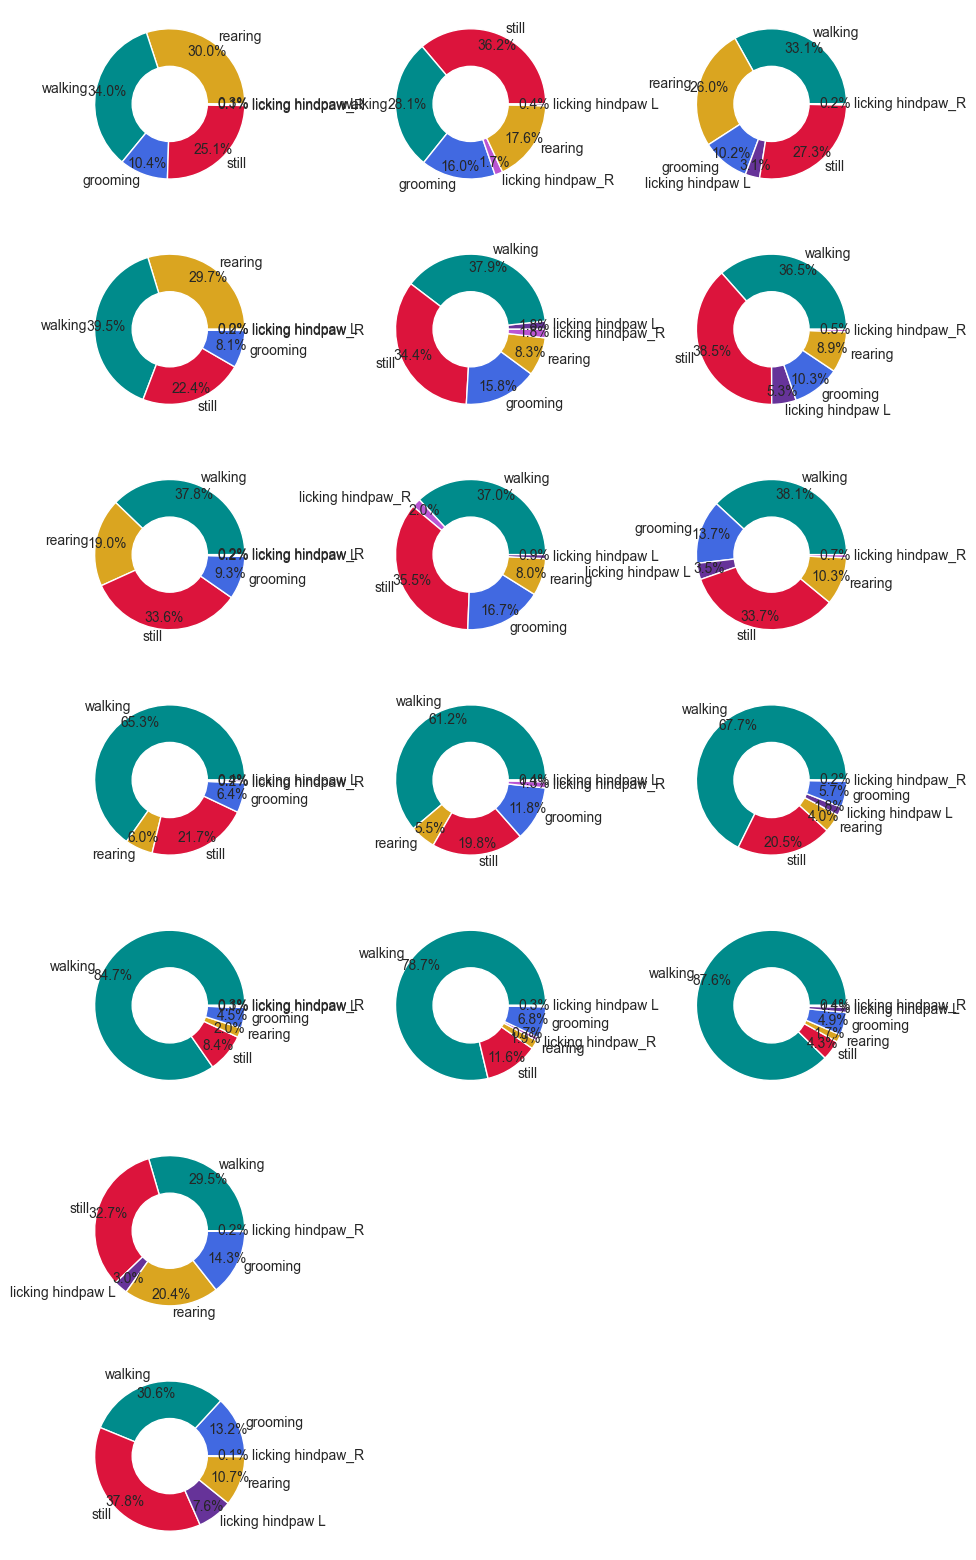

In [3]:
selected_sex = 'Male'
rows = len(groups)
cols = len(conditions)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(11, 20))
for row in range(rows):
    if row > 4:
        cols = 1
        fig.delaxes(ax[row, 1])
        fig.delaxes(ax[row, 2])
    else:
        cols = len(conditions)
        
    for col in range(cols):
        
        selected_group = groups[row]
        if selected_group == 'Group6':
            selected_condition = conditions_extra[0]
        elif selected_group == 'Group7':
            selected_condition = conditions_extra[1]
        else:
            selected_condition = conditions[col]
        
        
        predict_dict = {'condition': np.repeat(selected_condition, 
                                               len(np.hstack([behaviors[selected_sex][selected_group][selected_condition][f'file{i}'] 
                                                              for i in range(len(behaviors[selected_sex][selected_group][selected_condition]))]))),
                        'behavior': np.hstack([behaviors[selected_sex][selected_group][selected_condition][f'file{i}'] 
                                               for i in range(len(behaviors[selected_sex][selected_group][selected_condition]))])}
        df_raw = pd.DataFrame(data=predict_dict)
        labels = df_raw['behavior'].value_counts(sort=False).index
        values = df_raw['behavior'].value_counts(sort=False).values
        # summary dataframe
        df = pd.DataFrame()
        behavior_labels = []
        for l in labels:
            behavior_labels.append(behavior_names[int(l)])
        df["values"] = values
        df['labels'] = behavior_labels
        df["colors"] = df["labels"].apply(lambda x:
                                          behavior_colors[behavior_names.index(x)])  # to connect Column value to Color in Dict
        df.to_csv(f'../processed_dataset/behavior_total_frames/behavior_total_frames_{selected_sex}_{groups[row]}_{conditions[col]}.csv')

        # Pie Chart
        ax[row, col].pie(df['values'],
                         colors=df['colors'], 
                         labels=df['labels'],
                         autopct='%1.1f%%', 
                         pctdistance=0.85)
        # draw circle
        centre_circle = plt.Circle((0, 0), 
                                   0.50, 
                                   fc='white')
        # Adding Circle in Pie chart
        ax[row, col].add_artist(centre_circle)
        # ax[row, col].set_title('{}}')
        # Displaying Chart
plt.show()

### file save, change the extension to change the file format

In [4]:
fig.savefig(f'../figures/behavior_total_frames_{selected_sex}.svg', 
            dpi=600, bbox_inches='tight')

### Female -- Group x Condition

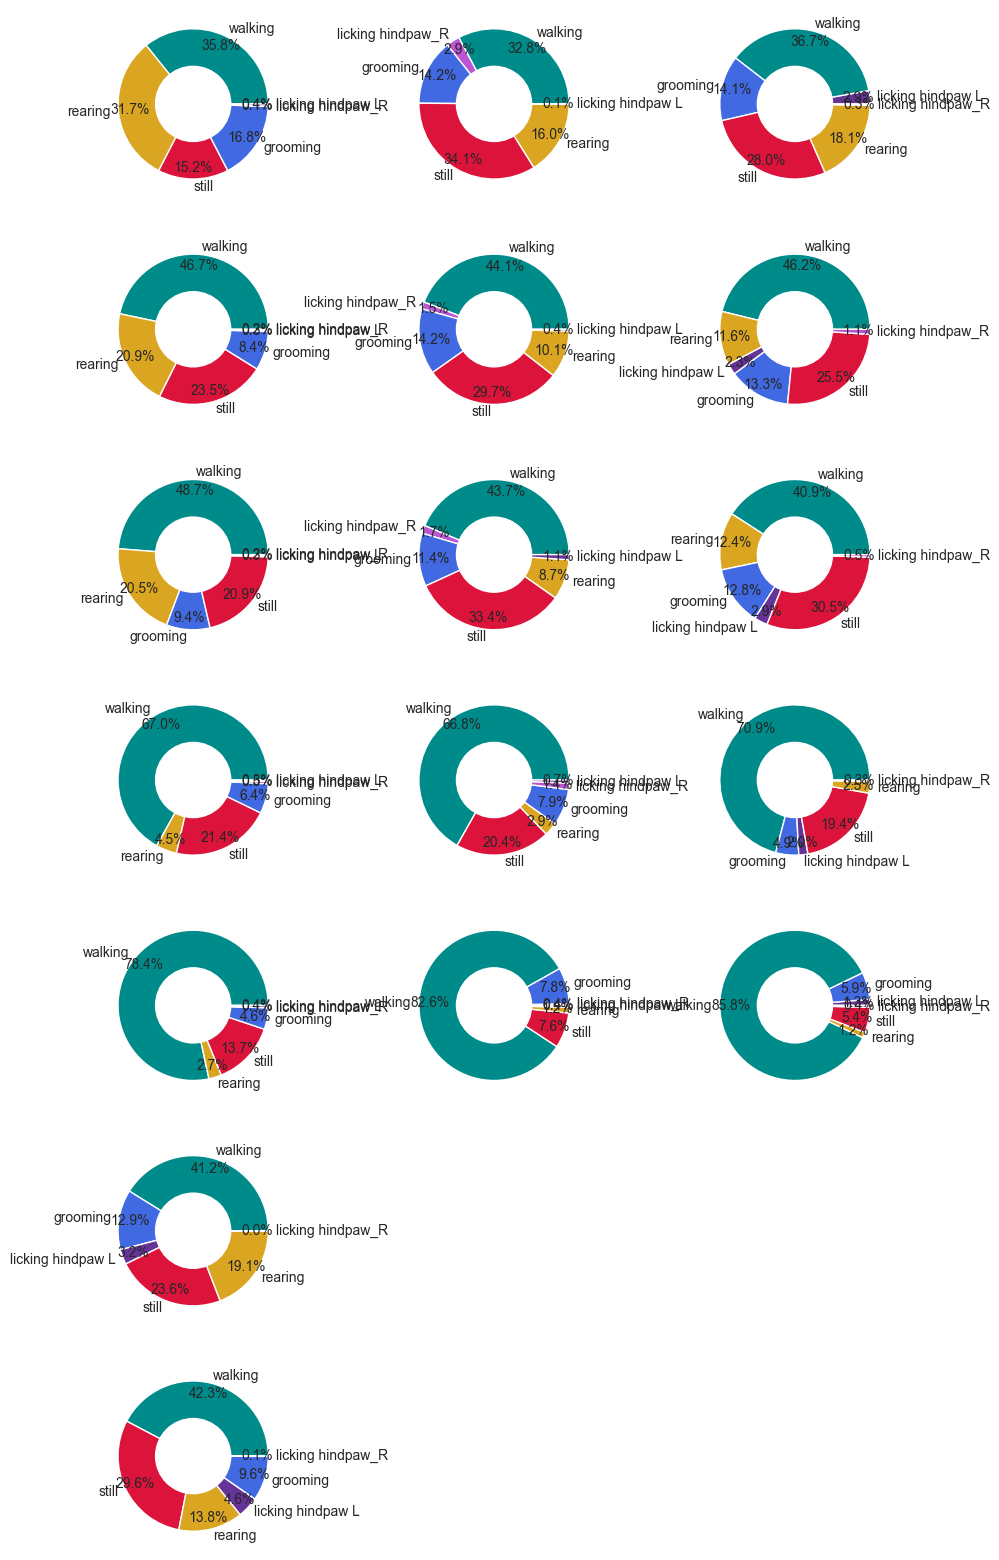

In [5]:
selected_sex = 'Female'
rows = len(groups)
cols = len(conditions)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(11, 20))
for row in range(rows):
    if row > 4:
        cols = 1
        fig.delaxes(ax[row, 1])
        fig.delaxes(ax[row, 2])
    else:
        cols = len(conditions)
        
    for col in range(cols):
        
        selected_group = groups[row]
        if selected_group == 'Group6':
            selected_condition = conditions_extra[0]
        elif selected_group == 'Group7':
            selected_condition = conditions_extra[1]
        else:
            selected_condition = conditions[col]
        
        
        predict_dict = {'condition': np.repeat(selected_condition, 
                                               len(np.hstack([behaviors[selected_sex][selected_group][selected_condition][f'file{i}'] 
                                                              for i in range(len(behaviors[selected_sex][selected_group][selected_condition]))]))),
                        'behavior': np.hstack([behaviors[selected_sex][selected_group][selected_condition][f'file{i}'] 
                                               for i in range(len(behaviors[selected_sex][selected_group][selected_condition]))])}
        df_raw = pd.DataFrame(data=predict_dict)
        labels = df_raw['behavior'].value_counts(sort=False).index
        values = df_raw['behavior'].value_counts(sort=False).values
        # summary dataframe
        df = pd.DataFrame()
        behavior_labels = []
        for l in labels:
            behavior_labels.append(behavior_names[int(l)])
        df["values"] = values
        df['labels'] = behavior_labels
        df["colors"] = df["labels"].apply(lambda x:
                                          behavior_colors[behavior_names.index(x)])  # to connect Column value to Color in Dict
        df.to_csv(f'../processed_dataset/behavior_total_frames/behavior_total_frames_{selected_sex}_{groups[row]}_{conditions[col]}.csv')

        # Pie Chart
        ax[row, col].pie(df['values'],
                         colors=df['colors'], 
                         labels=df['labels'],
                         autopct='%1.1f%%', 
                         pctdistance=0.85)
        # draw circle
        centre_circle = plt.Circle((0, 0), 
                                   0.50, 
                                   fc='white')
        # Adding Circle in Pie chart
        ax[row, col].add_artist(centre_circle)
        # ax[row, col].set_title('{}}')
        # Displaying Chart
plt.show()

### file save, change the extension to change the file format

In [6]:
fig.savefig(f'../figures/behavior_total_frames_{selected_sex}.svg', 
            dpi=600, bbox_inches='tight')